# EDA - Campeonato Espanhol de Futebol - Divisão 1

# 1. Introdução
No desafio de hoje, a ideia é realizar uma análise exploratória geral dos datasets disponibilizados, e depois utilizá-los para verificar se existe um paralelo entre algumas citações comuns ao futebol se aplicado ao Campeonato Brasileiro. Ao final, se utilizará as estatísticas disponibilizadas para verificar como jogaram os últimos times campeões espanhois.

# 2. Dataset
Dataset disponivel em [football-data](https://www.football-data.co.uk/brazil.php). Contem dados sobre o campeonato espanhol de futebol dos anos de 2021 a 2024.

# 2.1 Dicionário dos dados
**Legenda para os dados dos resultados:**

* Div = Divisão da Liga  
* Date = Data da Partida (dd/mm/aa)  
* Time = Horário de início da partida  
* HomeTeam = Time da Casa (Mandante)  
* AwayTeam = Time Visitante  
* FTHG e HG = Gols do Time da Casa ao Final do Jogo  
* FTAG e AG = Gols do Time Visitante ao Final do Jogo  
* FTR e Res = Resultado Final (H=Vitória da Casa, D=Empate, A=Vitória do Visitante)  
* HTHG = Gols do Time da Casa no Primeiro Tempo  
* HTAG = Gols do Time Visitante no Primeiro Tempo  
* HTR = Resultado no Primeiro Tempo (H=Vitória da Casa, D=Empate, A=Vitória do Visitante)  

**Estatísticas da Partida (quando disponíveis)**  
* Attendance = Público Presente  
* Referee = Árbitro da Partida  
* HS = Chutes (Finalizações) do Time da Casa  
* AS = Chutes (Finalizações) do Time Visitante  
* HST = Chutes a Gol do Time da Casa  
* AST = Chutes a Gol do Time Visitante  
* HHW = Bolas na Trave do Time da Casa  
* AHW = Bolas na Trave do Time Visitante  
* HC = Escanteios do Time da Casa  
* AC = Escanteios do Time Visitante  
* HF = Faltas Cometidas pelo Time da Casa  
* AF = Faltas Cometidas pelo Time Visitante   
* HFKC = Tiros Livres Sofridos pelo Time da Casa  
* AFKC = Tiros Livres Sofridos pelo Time Visitante  
* HO = Impedimentos do Time da Casa   
* AO = Impedimentos do Time Visitante  
* HY = Cartões Amarelos do Time da Casa  
* AY = Cartões Amarelos do Time Visitante  
* HR = Cartões Vermelhos do Time da Casa  
* AR = Cartões Vermelhos do Time Visitante  
* HBP = Pontos de Cartão do Time da Casa (10 = amarelo, 25 = vermelho)  
* ABP = Pontos de Cartão do Time Visitante (10 = amarelo, 25 = vermelho)


# 3. Análise exploratória de dados

A diretoria precisa traçar um plano para a próxima temporada, porém precisa de algumas repostas para iniciar a estratéia do clube.

Perguntas que devem ser respondidas:
* Quais são os 10 clubes com mais vitórias no histórico do campeonato?
* Qual o total de gols marcados por times da casa em comparação com times visitantes?
* Qual é a média de gols por partida e como esses gols se distribuem?
* Qual é a distribuição percentual de vitórias da casa, empates e vitórias do visitante?
* Como as médias de cartões amarelos, vermelhos, faltas, escanteios, chutes ao gol, tiro livre, bolas na trave e impedimento variaram ao longo das temporadas?
* A porcentagem de vitórias dos times da casa mudou significativamente ao longo das temporadas?




# Montar o ambiente de trabalho

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Desativar a limitação de linhas
pd.set_option('display.max_rows', None)
# Desativar a limitação de colunas
pd.set_option('display.max_columns', None)

In [ ]:
import google.colab.drive
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


# Extração dos dados

In [ ]:
# selecao colunas
colunas = [
    'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
    'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
    'AY', 'HR', 'AR'
    ]

# apontando o caminho do arquivo
caminho_arquivo = '/content/drive/MyDrive/python-data-analytics/aula04/dados/SP1_TP_2015_2016.csv'

# leitura do documento e seleção de colunas específicas
df_tp1516 = pd.read_csv(caminho_arquivo, usecols = colunas)
df_tp1516.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,SP1,21/08/15,Malaga,Sevilla,0,0,D,0,0,D,25,10,5,2,19,11,7,2,3,3,0,1
1,SP1,22/08/15,Ath Madrid,Las Palmas,1,0,H,1,0,H,14,8,3,1,11,16,4,4,2,0,0,0
2,SP1,22/08/15,Espanol,Getafe,1,0,H,1,0,H,4,14,2,3,19,14,5,6,2,3,0,1
3,SP1,22/08/15,La Coruna,Sociedad,0,0,D,0,0,D,15,9,5,2,16,10,5,4,3,2,0,0
4,SP1,22/08/15,Vallecano,Valencia,0,0,D,0,0,D,8,10,3,4,19,11,3,3,3,1,0,0


In [ ]:
df_tp1516.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR'],
      dtype='object')

In [ ]:
import glob
import os # Importamos a biblioteca 'os' para manipular nomes de arquivos

# 1. Apontar para a PASTA onde os arquivos estão
caminho_da_pasta = '/content/drive/MyDrive/python-data-analytics/aula04/dados/*.csv'

# 2. Usar 'glob' para criar uma lista com o caminho de todos os arquivos
todos_os_arquivos = glob.glob(caminho_da_pasta)

# 3. Criar uma lista vazia para armazenar os DataFrames
lista_de_dataframes = []

# 4. Fazer um loop por cada caminho de arquivo encontrado
for caminho_completo in todos_os_arquivos:
    print(f"Lendo o arquivo: {caminho_completo}")

    nome_base_arquivo = os.path.basename(caminho_completo)
    nome_sem_extensao, _ = os.path.splitext(nome_base_arquivo)
    df_temp = pd.read_csv(caminho_completo, usecols=colunas)
    df_temp['temporada'] = nome_sem_extensao[-12:]
    lista_de_dataframes.append(df_temp)

# 5. Concatenar (juntar) todos os DataFrames da lista em um único DataFrame
df_final = pd.concat(lista_de_dataframes, ignore_index=True)

# 6. Verificar o resultado, mostrando a nova coluna
print("\n--- Processo Finalizado ---")
print(f"Total de linhas no DataFrame combinado: {len(df_final)}")

# Verificando todos os valores únicos na nova coluna para confirmar que todos os arquivos foram lidos
print("\nNomes dos arquivos lidos (valores únicos na coluna 'temporada'):")
print(df_final['temporada'].unique())

Lendo o arquivo: /content/drive/MyDrive/python-data-analytics/aula04/dados/SP1_TP_2015_2016.csv
Lendo o arquivo: /content/drive/MyDrive/python-data-analytics/aula04/dados/SP1_TP_2016_2017.csv
Lendo o arquivo: /content/drive/MyDrive/python-data-analytics/aula04/dados/SP1_TP_2017_2018.csv
Lendo o arquivo: /content/drive/MyDrive/python-data-analytics/aula04/dados/SP1_TP_2018_2019.csv
Lendo o arquivo: /content/drive/MyDrive/python-data-analytics/aula04/dados/SP1_TP_2019_2020.csv
Lendo o arquivo: /content/drive/MyDrive/python-data-analytics/aula04/dados/SP1_TP_2020_2021.csv
Lendo o arquivo: /content/drive/MyDrive/python-data-analytics/aula04/dados/SP1_TP_2021_2022.csv
Lendo o arquivo: /content/drive/MyDrive/python-data-analytics/aula04/dados/SP1_TP_2022_2023.csv
Lendo o arquivo: /content/drive/MyDrive/python-data-analytics/aula04/dados/SP1_TP_2023_2024.csv

--- Processo Finalizado ---
Total de linhas no DataFrame combinado: 3420

Nomes dos arquivos lidos (valores únicos na coluna 'temporada

In [ ]:
df_final.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,temporada
0,SP1,21/08/15,Malaga,Sevilla,0,0,D,0,0,D,25,10,5,2,19,11,7,2,3,3,0,1,TP_2015_2016
1,SP1,22/08/15,Ath Madrid,Las Palmas,1,0,H,1,0,H,14,8,3,1,11,16,4,4,2,0,0,0,TP_2015_2016
2,SP1,22/08/15,Espanol,Getafe,1,0,H,1,0,H,4,14,2,3,19,14,5,6,2,3,0,1,TP_2015_2016
3,SP1,22/08/15,La Coruna,Sociedad,0,0,D,0,0,D,15,9,5,2,16,10,5,4,3,2,0,0,TP_2015_2016
4,SP1,22/08/15,Vallecano,Valencia,0,0,D,0,0,D,8,10,3,4,19,11,3,3,3,1,0,0,TP_2015_2016


In [ ]:
df_final.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000
mean,1.494152,1.129825,0.653509,0.494737,13.213450,10.410526,4.660819,3.643567,13.499415,13.388012,5.334503,4.143567,2.403216,2.593567,0.111988,0.127778
std,1.289697,1.115757,0.829129,0.717660,4.871324,4.271963,2.501976,2.136776,4.143979,4.180979,2.841186,2.474586,1.533764,1.513617,0.332551,0.355116
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,3.000000,2.000000,11.000000,10.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,4.000000,3.000000,13.000000,13.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,13.000000,6.000000,5.000000,16.000000,16.000000,7.000000,6.000000,3.000000,4.000000,0.000000,0.000000
max,10.000000,8.000000,5.000000,5.000000,36.000000,35.000000,17.000000,15.000000,29.000000,31.000000,20.000000,17.000000,9.000000,9.000000,2.000000,2.000000


In [ ]:
df_final.describe(include='object')

,Div,Date,HomeTeam,AwayTeam,FTR,HTR,temporada
count,3420,3420,3420,3420,3420,3420,3420
unique,1,1193,30,30,3,3,9
top,SP1,12/05/2019,Ath Madrid,Sevilla,H,D,TP_2015_2016
freq,3420,10,171,171,1557,1488,380


# Transformação: Criando novas features

In [ ]:
# 1. Crie uma lista com as condições na ordem de prioridade
condicoes = [
    df_final['FTHG'] > df_final['FTAG'],  # Condição para vitória do time da casa
    df_final['FTHG'] > df_final['FTAG'],  # Condição para vitória do time visitante
]

# 2. Crie a lista de resultados correspondentes a cada condição
resultados = [
    df_final['HomeTeam'],  # Resultado se a 1ª condição for verdadeira
    df_final['AwayTeam'],  # Resultado se a 2ª condição for verdadeira
]

# 3. Use np.select para criar a coluna 'win'.
# O argumento 'default' é o valor usado se NENHUMA das condições for atendida (neste caso, o empate)
df_final['win'] = np.select(condicoes, resultados, default='Empate')
df_final.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,temporada,win
0,SP1,21/08/15,Malaga,Sevilla,0,0,D,0,0,D,25,10,5,2,19,11,7,2,3,3,0,1,TP_2015_2016,Empate
1,SP1,22/08/15,Ath Madrid,Las Palmas,1,0,H,1,0,H,14,8,3,1,11,16,4,4,2,0,0,0,TP_2015_2016,Ath Madrid
2,SP1,22/08/15,Espanol,Getafe,1,0,H,1,0,H,4,14,2,3,19,14,5,6,2,3,0,1,TP_2015_2016,Espanol
3,SP1,22/08/15,La Coruna,Sociedad,0,0,D,0,0,D,15,9,5,2,16,10,5,4,3,2,0,0,TP_2015_2016,Empate
4,SP1,22/08/15,Vallecano,Valencia,0,0,D,0,0,D,8,10,3,4,19,11,3,3,3,1,0,0,TP_2015_2016,Empate


In [ ]:
df_final['win'] = np.where(
    df_final['FTHG'] > df_final['FTAG'],    # Condição 1: Casa venceu?
    df_final['HomeTeam'],                   # Se sim, retorne o time da casa
    np.where(
        df_final['FTAG'] > df_final['FTHG'],  # Condição 2: Visitante venceu?
        df_final['AwayTeam'],               # Se sim, retorne o time visitante
        'Empate'))

In [ ]:
# total de gols na partida
df_final['ttl_gols'] = df_final['FTHG'] + df_final['FTAG']

# total de Chutes (Finalizações) - HS/AS
df_final['ttl_finalizacoes'] = df_final['HS'] + df_final['AS']
# total de Chutes a Gol - HST/AST
df_final['ttl_chutes_gol'] = df_final['HST'] + df_final['AST']
# total de Escanteios - HC/AC
df_final['ttl_escanteios'] = df_final['HC'] + df_final['AC']
# total de Faltas Cometidas - HF/AF
df_final['ttl_faltas'] = df_final['HF'] + df_final['AF']
# total de Cartões Amarelos - HY/AY
df_final['ttl_cartoes_amarelo'] = df_final['HY'] + df_final['AY']
# total de Cartões Vermelhor - HR/AR
df_final['ttl_cartoes_vermelho'] = df_final['HR'] + df_final['AR']

In [ ]:
df_final.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,temporada,win,ttl_gols,ttl_finalizacoes,ttl_chutes_gol,ttl_escanteios,ttl_faltas,ttl_cartoes_amarelo,ttl_cartoes_vermelho
0,SP1,21/08/15,Malaga,Sevilla,0,0,D,0,0,D,25,10,5,2,19,11,7,2,3,3,0,1,TP_2015_2016,Empate,0,35,7,9,30,6,1
1,SP1,22/08/15,Ath Madrid,Las Palmas,1,0,H,1,0,H,14,8,3,1,11,16,4,4,2,0,0,0,TP_2015_2016,Ath Madrid,1,22,4,8,27,2,0
2,SP1,22/08/15,Espanol,Getafe,1,0,H,1,0,H,4,14,2,3,19,14,5,6,2,3,0,1,TP_2015_2016,Espanol,1,18,5,11,33,5,1
3,SP1,22/08/15,La Coruna,Sociedad,0,0,D,0,0,D,15,9,5,2,16,10,5,4,3,2,0,0,TP_2015_2016,Empate,0,24,7,9,26,5,0
4,SP1,22/08/15,Vallecano,Valencia,0,0,D,0,0,D,8,10,3,4,19,11,3,3,3,1,0,0,TP_2015_2016,Empate,0,18,7,6,30,4,0


In [ ]:
# Maiores vencedores
mais_vitorias = df_final['win'].value_counts().reset_index()
mais_vitorias = mais_vitorias.rename(columns={'win':'clube', 'count':'vitorias'})
mais_vitorias = mais_vitorias[mais_vitorias['clube']!='Empate']
mais_vitorias

,clube,vitorias
1,Barcelona,235
2,Real Madrid,230
3,Ath Madrid,208
4,Sevilla,153
5,Villarreal,147
6,Sociedad,146
7,Ath Bilbao,131
8,Betis,130
9,Valencia,120
10,Celta,107


# Quais são os 10 clubes com mais vitórias no histórico do campeonato?

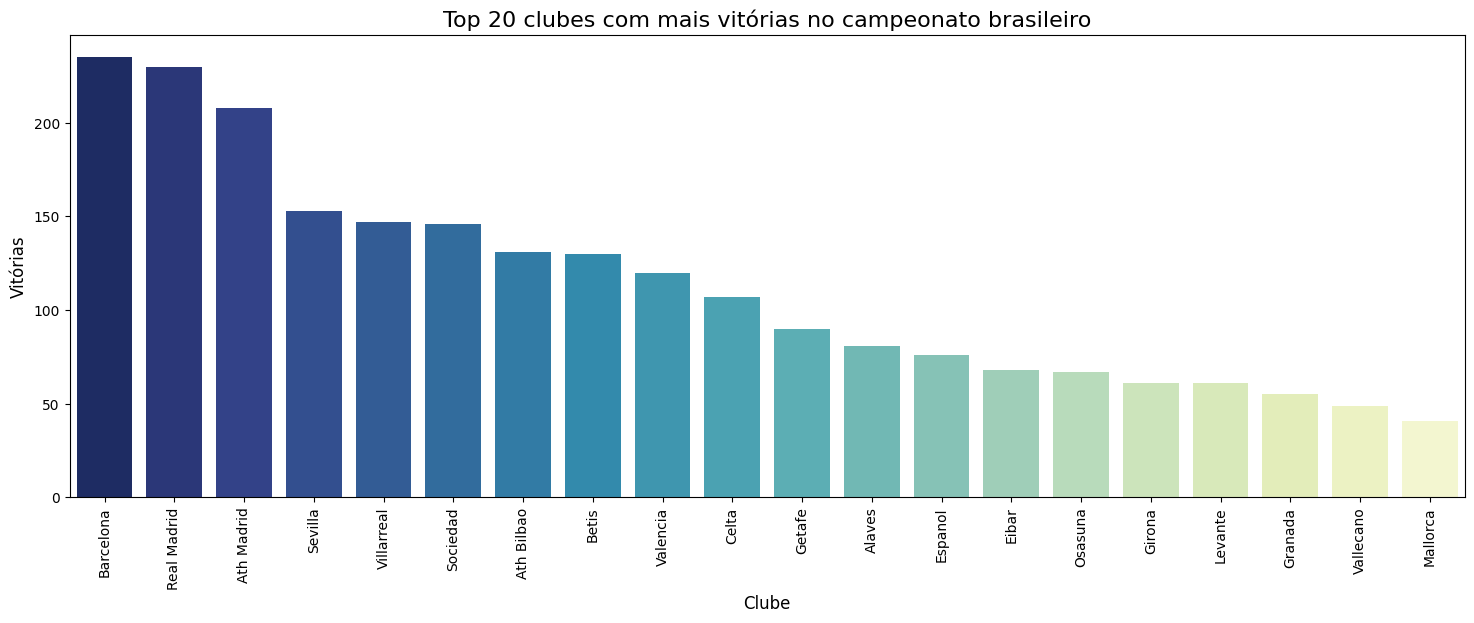

In [ ]:
fig, ax = plt.subplots(figsize = (18,6))
ax = sns.barplot(data=mais_vitorias[:20], x = 'clube', y='vitorias', palette = 'YlGnBu_r')
plt.title("Top 20 clubes com mais vitórias no campeonato brasileiro", fontsize = 16)
plt.xticks(fontsize = 10, rotation=90)
plt.xlabel('Clube', fontsize = 12)
plt.ylabel('Vitórias', fontsize = 12)
plt.show()

* Qual o total de gols marcados por times da casa em comparação com times visitantes?
* Qual é a média de gols por partida e como esses gols se distribuem?
* Qual é a distribuição percentual de vitórias da casa, empates e vitórias do visitante?

In [ ]:
# numero de gols mandante e visitante
numero_gols = {'mandante':df_final['FTHG'].sum(), 'visitante':df_final['FTAG'].sum()}
numero_gols = pd.DataFrame({'Tipo':numero_gols.keys(), 'gols':numero_gols.values()})
numero_gols

,Tipo,gols
0,mandante,5110
1,visitante,3864


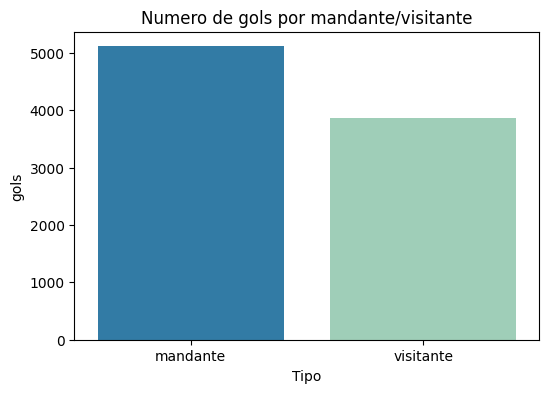

In [ ]:
plt.figure(figsize=(6, 4))

#plot gols
sns.barplot(data=numero_gols, x='Tipo', y='gols', palette = 'YlGnBu_r')
plt.title('Numero de gols por mandante/visitante')
plt.show()

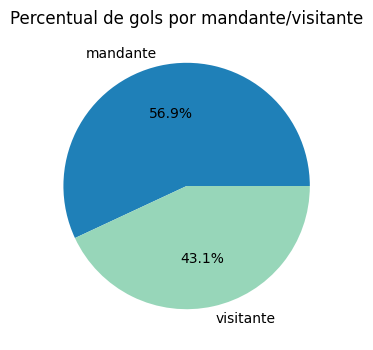

In [ ]:
plt.figure(figsize=(6, 4))

plt.pie(
    x=numero_gols['gols'],
    labels=numero_gols['Tipo'],
    autopct='%.1f%%',
    colors=sns.color_palette('YlGnBu_r', n_colors=len(numero_gols))
)
plt.title('Percentual de gols por mandante/visitante')
plt.show()

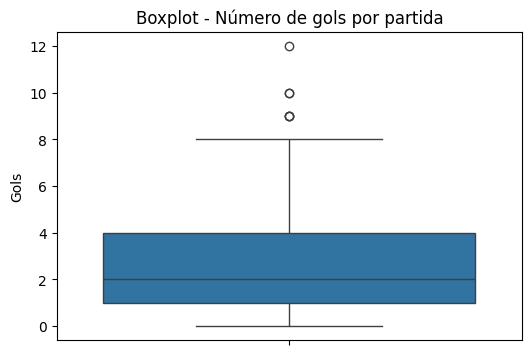

In [ ]:
plt.figure(figsize=(6, 4))
#plot boxplot gols por partida
sns.boxplot(data=df_final['ttl_gols'])
plt.title('Boxplot - Número de gols por partida')
plt.ylabel('Gols')
plt.show()

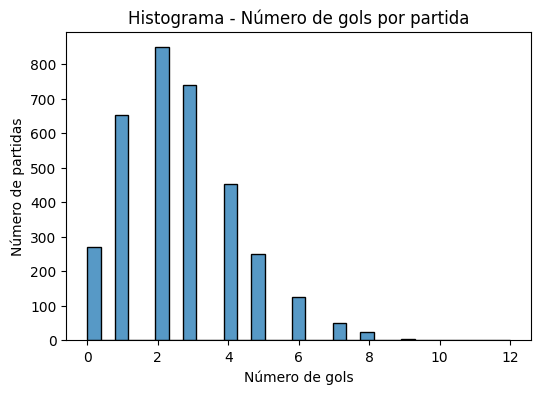

In [ ]:
plt.figure(figsize=(6, 4))
#plot histograma gols
sns.histplot(data=df_final['ttl_gols'])
plt.title('Histograma - Número de gols por partida')
plt.ylabel('Número de partidas')
plt.xlabel('Número de gols')
plt.show()

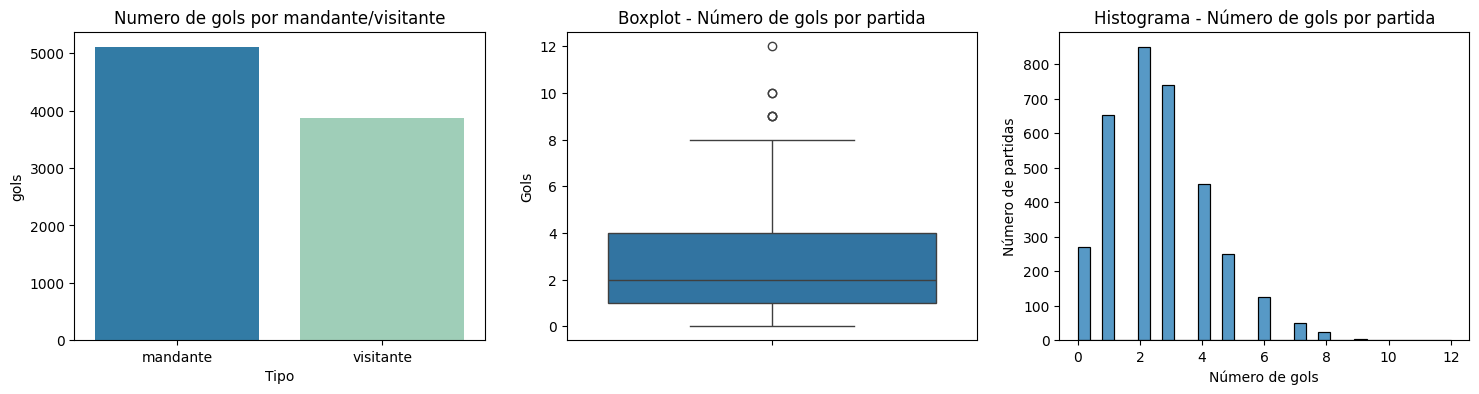

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (18,4))

#plot gols
sns.barplot(data=numero_gols, x='Tipo', y='gols', palette = 'YlGnBu_r', ax=axes[0])
axes[0].set_title('Numero de gols por mandante/visitante')

#gols por partida
# gols_partida=pd.DataFrame(partidas_br['mandante_Placar']+partidas_br['visitante_Placar'], columns=['gols_total'])

#plot boxplot gols por partida
sns.boxplot(data=df_final, y='ttl_gols', ax= axes[1])
# sns.boxplot(data=df_final, y='ttl_gols', x='FTR', ax= axes[1])
axes[1].set_title('Boxplot - Número de gols por partida')
axes[1].set_ylabel('Gols')

#plot histograma gols
sns.histplot(data=df_final, x='ttl_gols', ax=axes[2])
axes[2].set_title('Histograma - Número de gols por partida')
axes[2].set_ylabel('Número de partidas')
axes[2].set_xlabel('Número de gols')

# plt.savefig(
#     'meu_grafico_alta_qualidade.png',
#     dpi=300,
#     bbox_inches='tight'
# )

plt.show()

Analisando os dados de partidas, temos o Barcelona com o maior número de vitórias no campeonato (351), seguido por Real Madrid (335) e Ath Madrid (329). Em relação aos gols, o número de gols marcados pelos mandantes prevalecem sobre o número de gols marcados pelos visitantes. Comparando o número de gols marcados por partida, temos uma 50% das partidas com 2 gols ou menos, enquanto somente 25% das partidas tiveram 4 gols ou mais.

In [ ]:
df_final[df_final['ttl_gols']==df_final['ttl_gols'].max()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,temporada,win,ttl_gols,ttl_finalizacoes,ttl_chutes_gol,ttl_escanteios,ttl_faltas,ttl_cartoes_amarelo,ttl_cartoes_vermelho
157,SP1,20/12/15,Real Madrid,Vallecano,10,2,H,4,2,H,30,9,15,4,12,12,10,4,1,2,0,2,TP_2015_2016,Real Madrid,12,39,19,14,24,3,2


* Como as médias de cartões amarelos, vermelhos, faltas, escanteios, chutes ao gol, tiro livre, bolas na trave e impedimento variaram ao longo das temporadas?

In [ ]:
# # total de gols na partida
# df_final['ttl_gols'] = df_final['FTHG'] + df_final['FTAG']

# # total de Chutes (Finalizações) - HS/AS
# df_final['ttl_finalizacoes'] = df_final['HS'] + df_final['AS']
# # total de Chutes a Gol - HST/AST
# df_final['ttl_chutes_gol'] = df_final['HST'] + df_final['AST']
# # total de Escanteios - HC/AC
# df_final['ttl_escanteios'] = df_final['HC'] + df_final['AC']
# # total de Faltas Cometidas - HF/AF
# df_final['ttl_faltas'] = df_final['HF'] + df_final['AF']
# # total de Cartões Amarelos - HY/AY
# df_final['ttl_cartoes_amarelo'] = df_final['HY'] + df_final['AY']
# # total de Cartões Vermelhor - HR/AR
# df_final['ttl_cartoes_vermelho'] = df_final['HR'] + df_final['AR']

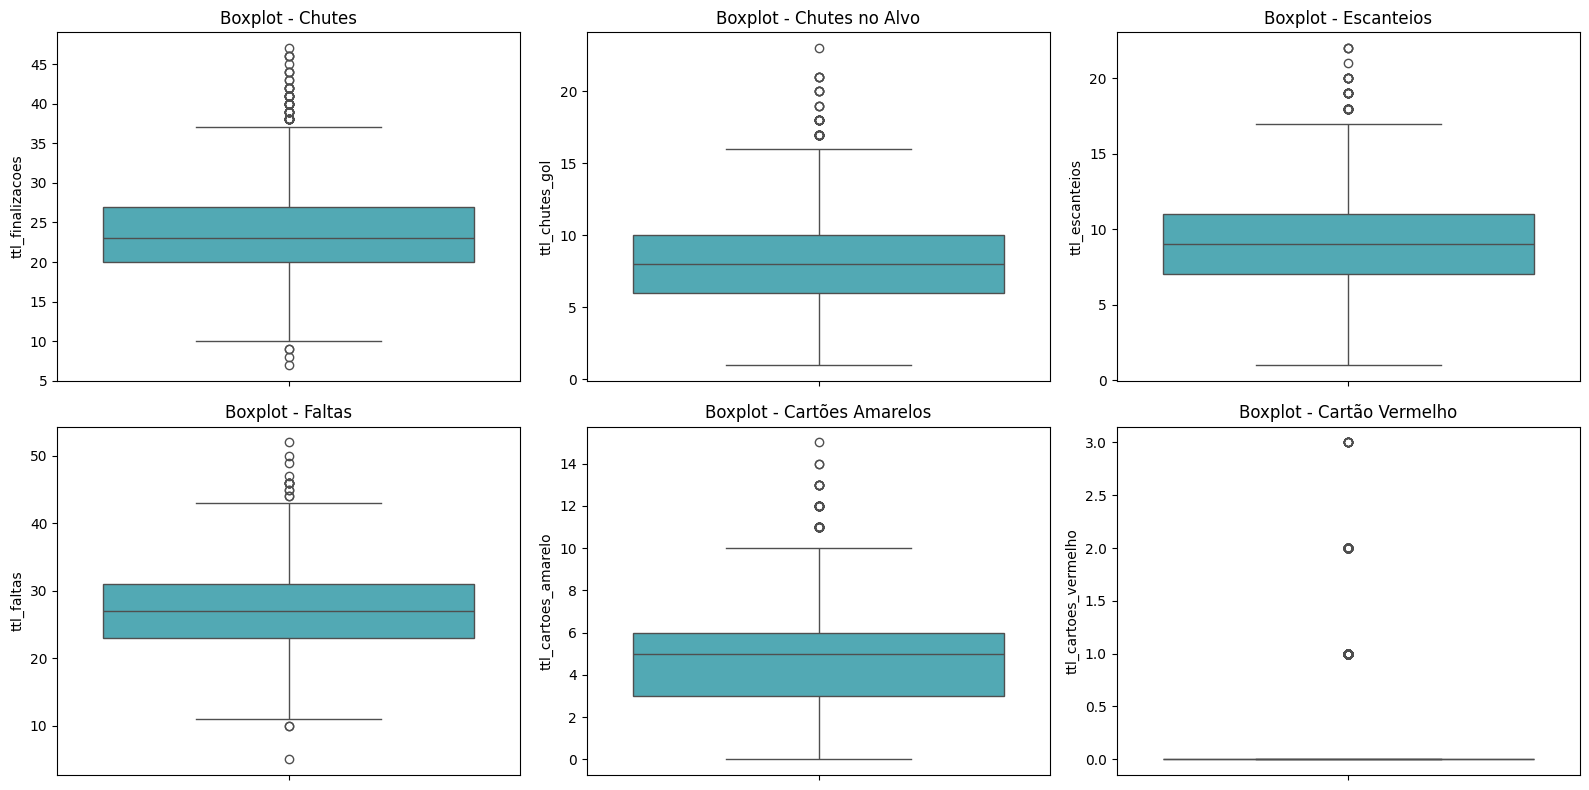

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

# --- Primeira Linha ---

# Gráfico 1: Chutes
sns.boxplot(y='ttl_finalizacoes', data=df_final, ax=axes[0, 0], palette='YlGnBu_r')
axes[0, 0].set_title('Boxplot - Chutes')

# Gráfico 2: Chutes no Alvo
sns.boxplot(y='ttl_chutes_gol', data=df_final, ax=axes[0, 1], palette='YlGnBu_r')
axes[0, 1].set_title('Boxplot - Chutes no Alvo')

# Gráfico 3: Escanteios
sns.boxplot(y='ttl_escanteios', data=df_final, ax=axes[0, 2], palette='YlGnBu_r')
axes[0, 2].set_title('Boxplot - Escanteios')

# Gráfico 4: Faltas
sns.boxplot(y='ttl_faltas', data=df_final, ax=axes[1, 0], palette='YlGnBu_r')
axes[1, 0].set_title('Boxplot - Faltas')

# Gráfico 5: Cartões Amarelos
sns.boxplot(y='ttl_cartoes_amarelo', data=df_final, ax=axes[1, 1], palette='YlGnBu_r')
axes[1, 1].set_title('Boxplot - Cartões Amarelos')

# Gráfico 6: Cartões Vermelhos
sns.boxplot(y='ttl_cartoes_vermelho', data=df_final, ax=axes[1, 2], palette='YlGnBu_r')
axes[1, 2].set_title('Boxplot - Cartão Vermelho')

# Ajusta o layout para evitar sobreposição e exibe o gráfico
plt.tight_layout()
plt.show()

Em relação aos chutes, temos uma média de 23 chutes por equipe por partida, com uma média de 8 chutes no alvo. 50% das partidas tiveram 22 chutes ou menos por equipe, e a o número máximo de chutes de um time em uma partida foi 47. As equipes tem uma média de 28 faltas por jogo, e somente 25% das partidas tem mais de 3 cartões amarelos.

# 3.4 Análise: Desempenho geral  
Neste tópico, o objetivo é utilizar como guia algumas citações do mundo do futebol para verificar se existe um paralelo com o que mostra os dados relacionados às partidas do Campeonato.
  
* O fator casa é extremamente valorizado no futebol. Historicamente existe uma vantagem do mandante em relação ao visitante no campeonato brasileiro?  
* A porcentagem de vitórias dos times da casa mudou significativamente ao longo das temporadas?

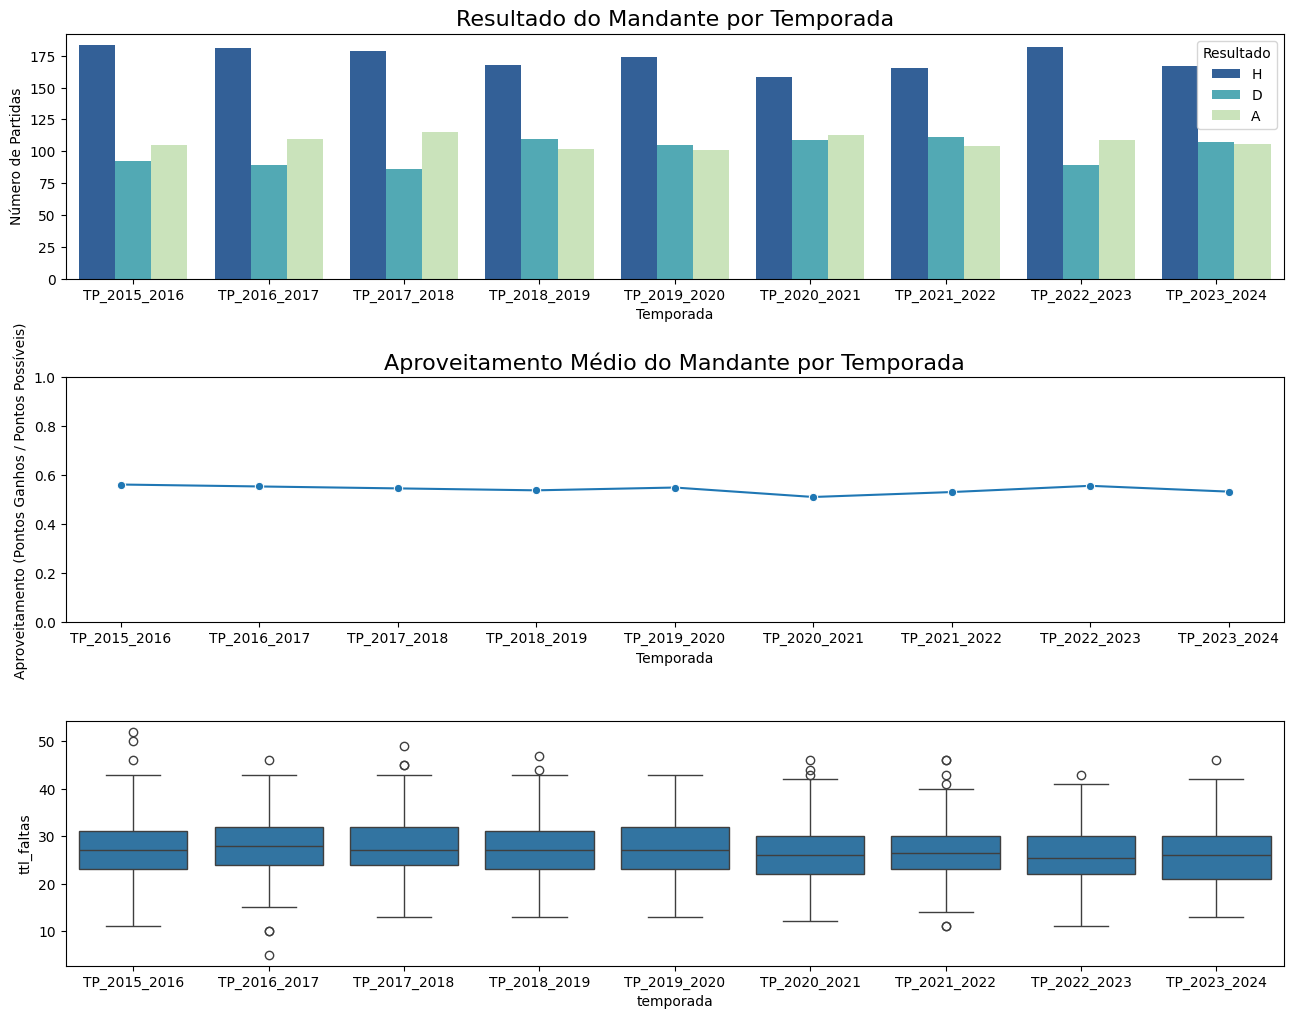

In [ ]:
# com as colunas 'temporada' e 'FTR'

# --- Início da Correção ---
# Passo 1: Criar uma coluna numérica para os pontos do mandante
# Usamos .map() para mapear cada resultado a um valor de pontos
pontos_map = {'H': 3, 'D': 1, 'A': 0}
df_final['pontos_mandante'] = df_final['FTR'].map(pontos_map)

# Passo 2: Calcular o aproveitamento médio por temporada
# Agrupamos por temporada, calculamos a média de pontos e dividimos por 3 (total de pontos possível)
aproveitamento_df = (df_final.groupby('temporada')['pontos_mandante'].mean() / 3).reset_index()
aproveitamento_df.rename(columns={'pontos_mandante': 'aproveitamento_medio'}, inplace=True)


fig, ax = plt.subplots(3, 1, figsize=(14, 11))
fig.tight_layout(pad=5.0)

# --- Gráfico 1 (countplot)
ordem_legenda = ['H', 'D', 'A']
sns.countplot(x='temporada', hue='FTR', palette='YlGnBu_r', data=df_final, ax=ax[0], hue_order=ordem_legenda)
ax[0].set_title('Resultado do Mandante por Temporada', fontsize=16)
ax[0].set_ylabel('Número de Partidas')
ax[0].set_xlabel('Temporada')
ax[0].legend(title='Resultado')


# --- Gráfico 2 (lineplot)
# Usamos o novo DataFrame 'aproveitamento_df' e a coluna 'aproveitamento_medio'
sns.lineplot(x="temporada", y='aproveitamento_medio', data=aproveitamento_df, marker='o', ax=ax[1])
ax[1].set_title('Aproveitamento Médio do Mandante por Temporada', fontsize=16)
ax[1].set_ylabel('Aproveitamento (Pontos Ganhos / Pontos Possíveis)')
ax[1].set_xlabel('Temporada')

sns.boxplot(x="temporada", y='ttl_faltas', data=df_final, ax=ax[2])
ax[1].set_title('Aproveitamento Médio do Mandante por Temporada', fontsize=16)
ax[1].set_ylabel('Aproveitamento (Pontos Ganhos / Pontos Possíveis)')
ax[1].set_xlabel('Temporada')

ax[1].set_ylim(0, 1)
plt.show()

In [ ]:
print(aproveitamento_df['aproveitamento_medio'].mean())

0.5427875243664717


In [ ]:
print(aproveitamento_df['aproveitamento_medio'].mean())
print(aproveitamento_df.loc[aproveitamento_df['aproveitamento_medio']==aproveitamento_df['aproveitamento_medio'].max()])
print(aproveitamento_df.loc[aproveitamento_df['aproveitamento_medio']==aproveitamento_df['aproveitamento_medio'].min()])

0.5427875243664717
      temporada  aproveitamento_medio
0  TP_2015_2016              0.562281
      temporada  aproveitamento_medio
5  TP_2020_2021              0.511404


Com os gráficos acima, é possivel notar que historicamente o número de vitórias do mandante é maior que o número de empates e derrotas. Em alguns anos notou-se que ocorreram mais derrotas que empates para mandantes, mas na maior parte dos campeonatos a quantidade de derrotas do mandante é menor que a de empates.

Em relação ao aproveitamento, temos uma média de aproximadamente 54,27% de aproveitamento dos pontos para o mandante. O maior aproveitamento de pontos do mandante foi de 56,22% e ocorreu no ano de 2008, e o menor aproveitamento foi notado na temporada de 2020_2021, com aproximadamente 51,14%.

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://46dfc8dc4093ef6f1e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


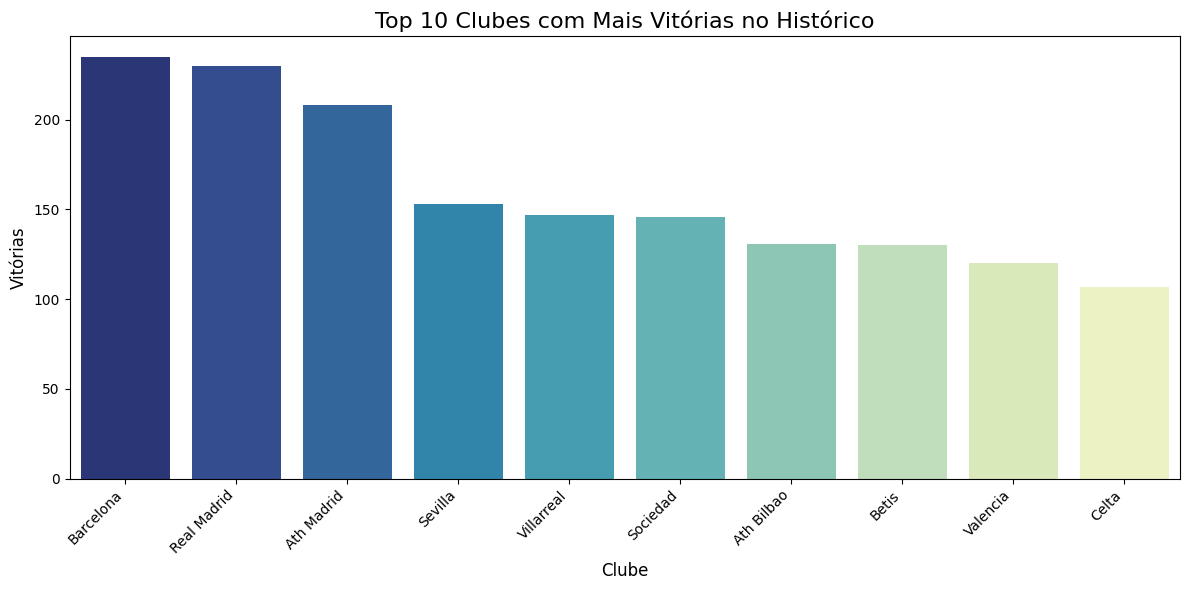

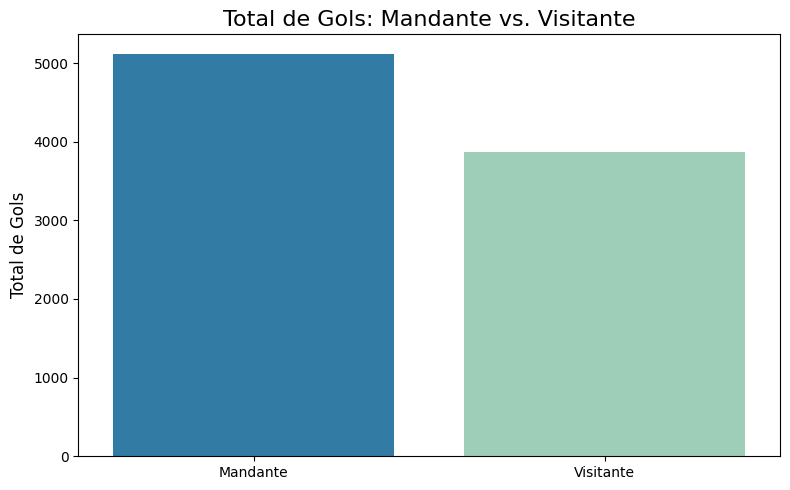

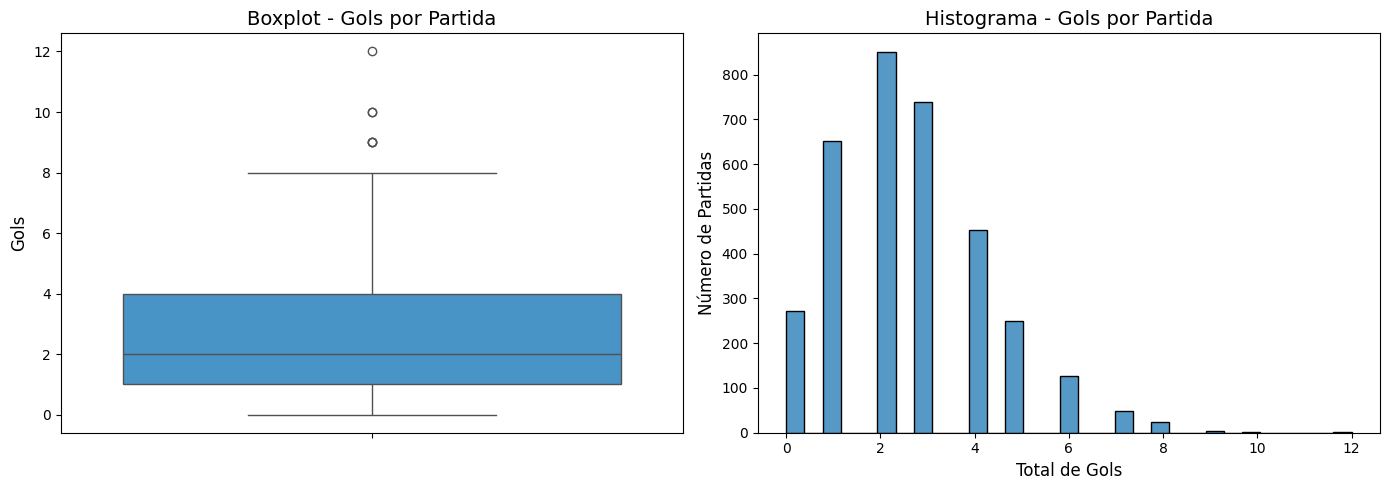

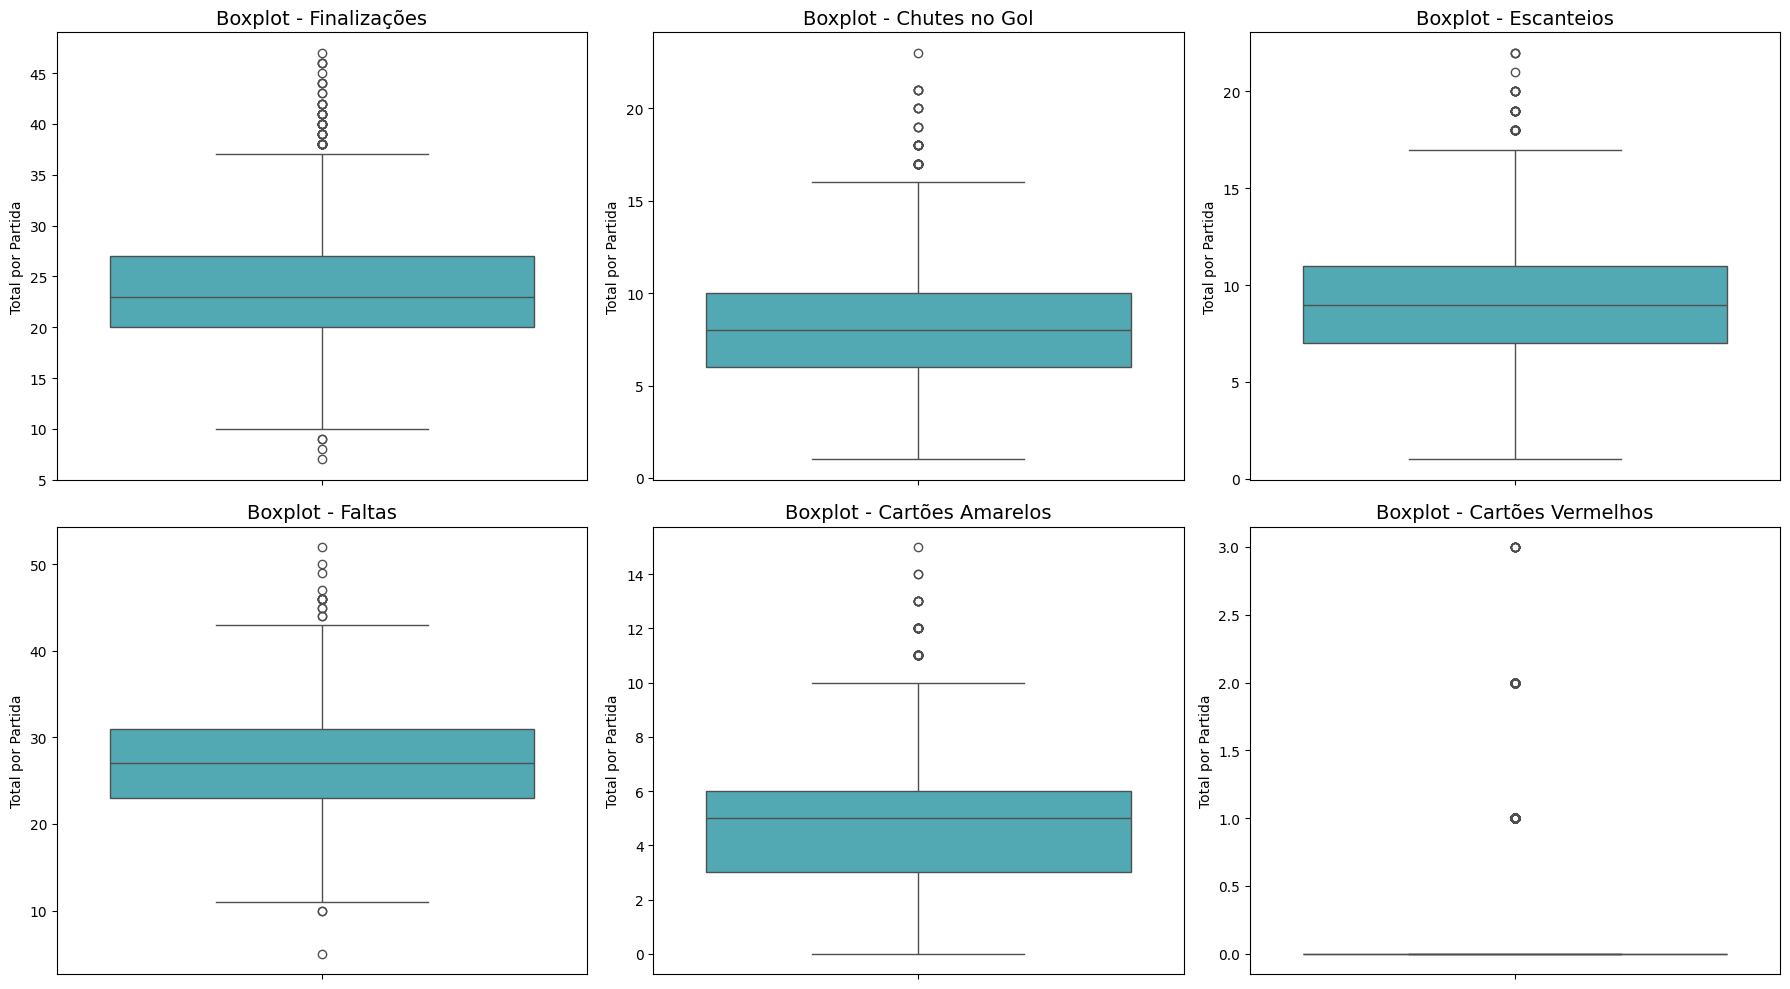

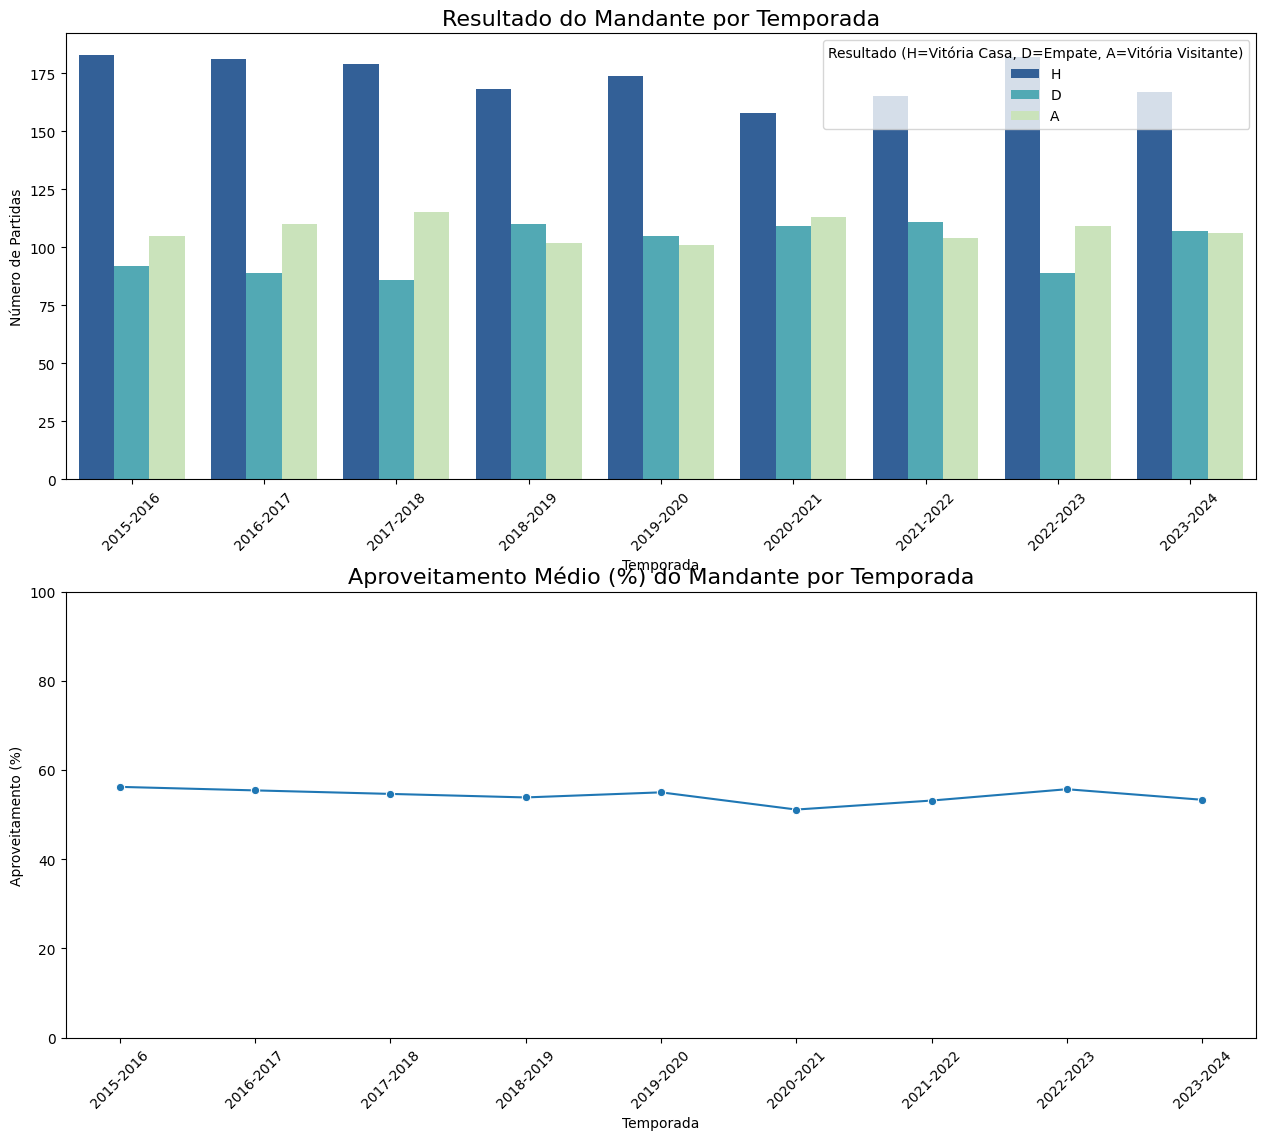

In [ ]:
# -*- coding: utf-8 -*-
"""
Dashboard Interativo com Gradio para Análise do Campeonato Espanhol.

Para executar:
1. Instale as bibliotecas necessárias: pip install gradio pandas matplotlib seaborn
2. Coloque os arquivos CSV de dados em uma pasta chamada 'dados'.
3. Execute o script a partir do terminal: python nome_do_arquivo.py
"""

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os
import gradio as gr
import warnings

warnings.filterwarnings('ignore')

caminho_da_pasta = '/content/drive/MyDrive/python-data-analytics/aula04/dados/SP1_TP_2015_2016.csv'

# --- ETAPA 1: CARREGAMENTO E PREPARAÇÃO DOS DADOS ---
# Esta função centraliza toda a lógica de carregamento e transformação dos dados.
def carregar_e_preparar_dados(caminho_da_pasta):
    """
    Carrega, combina e transforma os dados de múltiplos arquivos CSV.
    """
    # Colunas a serem usadas
    colunas = [
        'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
        'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
        'AY', 'HR', 'AR'
    ]

    # Encontrar todos os arquivos CSV na pasta especificada
    todos_os_arquivos = glob.glob(os.path.join(caminho_da_pasta, '*.csv'))

    if not todos_os_arquivos:
        raise FileNotFoundError(f"Nenhum arquivo CSV encontrado em '{caminho_da_pasta}'. Verifique o caminho.")

    lista_de_dataframes = []

    # Loop para ler cada arquivo e adicionar a coluna 'temporada'
    for caminho_completo in todos_os_arquivos:
        nome_base_arquivo = os.path.basename(caminho_completo)
        nome_sem_extensao, _ = os.path.splitext(nome_base_arquivo)
        try:
            df_temp = pd.read_csv(caminho_completo, usecols=colunas, encoding='latin1')
            # Extrai um nome de temporada mais limpo do nome do arquivo
            temporada = nome_sem_extensao.replace('SP1_TP_', '').replace('_', '-')
            df_temp['temporada'] = temporada
            lista_de_dataframes.append(df_temp)
        except Exception as e:
            print(f"Erro ao ler {caminho_completo}: {e}")


    # Concatenar todos os DataFrames
    df_final = pd.concat(lista_de_dataframes, ignore_index=True)

    # Transformação: Criando novas features
    df_final['win'] = np.where(
        df_final['FTHG'] > df_final['FTAG'],
        df_final['HomeTeam'],
        np.where(
            df_final['FTAG'] > df_final['FTHG'],
            df_final['AwayTeam'],
            'Empate'
        )
    )

    df_final['ttl_gols'] = df_final['FTHG'] + df_final['FTAG']
    df_final['ttl_finalizacoes'] = df_final['HS'] + df_final['AS']
    df_final['ttl_chutes_gol'] = df_final['HST'] + df_final['AST']
    df_final['ttl_escanteios'] = df_final['HC'] + df_final['AC']
    df_final['ttl_faltas'] = df_final['HF'] + df_final['AF']
    df_final['ttl_cartoes_amarelo'] = df_final['HY'] + df_final['AY']
    df_final['ttl_cartoes_vermelho'] = df_final['HR'] + df_final['AR']

    return df_final

# --- ETAPA 2: FUNÇÕES PARA GERAR GRÁFICOS E TABELAS ---

def get_clubes_mais_vitorias_df(df):
    """Retorna um DataFrame com os clubes com mais vitórias."""
    mais_vitorias = df['win'].value_counts().reset_index()
    mais_vitorias = mais_vitorias.rename(columns={'win': 'clube', 'count': 'vitorias'})
    mais_vitorias = mais_vitorias[mais_vitorias['clube'] != 'Empate'].head(10)
    return mais_vitorias

def plot_clubes_mais_vitorias(df):
    """Gera um gráfico de barras com os 10 clubes com mais vitórias."""
    mais_vitorias = get_clubes_mais_vitorias_df(df)
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(data=mais_vitorias, x='clube', y='vitorias', palette='YlGnBu_r', ax=ax)
    ax.set_title("Top 10 Clubes com Mais Vitórias no Histórico", fontsize=16)
    ax.set_xlabel('Clube', fontsize=12)
    ax.set_ylabel('Vitórias', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    return fig

def plot_comparacao_gols(df):
    """Gera um gráfico de barras comparando gols de mandantes e visitantes."""
    numero_gols = {'Mandante': df['FTHG'].sum(), 'Visitante': df['FTAG'].sum()}
    numero_gols = pd.DataFrame({'Tipo': numero_gols.keys(), 'Gols': numero_gols.values()})

    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(data=numero_gols, x='Tipo', y='Gols', palette='YlGnBu_r', ax=ax)
    ax.set_title('Total de Gols: Mandante vs. Visitante', fontsize=16)
    ax.set_xlabel('')
    ax.set_ylabel('Total de Gols', fontsize=12)
    plt.tight_layout()
    return fig

def plot_distribuicao_gols(df):
    """Gera um boxplot e um histograma da distribuição de gols por partida."""
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Boxplot
    sns.boxplot(data=df, y='ttl_gols', ax=axes[0], palette=['#3498db'])
    axes[0].set_title('Boxplot - Gols por Partida', fontsize=14)
    axes[0].set_ylabel('Gols', fontsize=12)

    # Histograma
    sns.histplot(data=df, x='ttl_gols', ax=axes[1])
    axes[1].set_title('Histograma - Gols por Partida', fontsize=14)
    axes[1].set_ylabel('Número de Partidas', fontsize=12)
    axes[1].set_xlabel('Total de Gols', fontsize=12)

    plt.tight_layout()
    return fig

def plot_estatisticas_partida(df):
    """Gera boxplots para várias estatísticas de jogo."""
    estatisticas = {
        'Finalizações': 'ttl_finalizacoes',
        'Chutes no Gol': 'ttl_chutes_gol',
        'Escanteios': 'ttl_escanteios',
        'Faltas': 'ttl_faltas',
        'Cartões Amarelos': 'ttl_cartoes_amarelo',
        'Cartões Vermelhos': 'ttl_cartoes_vermelho'
    }

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for i, (titulo, coluna) in enumerate(estatisticas.items()):
        sns.boxplot(y=coluna, data=df, ax=axes[i], palette='YlGnBu_r')
        axes[i].set_title(f'Boxplot - {titulo}', fontsize=14)
        axes[i].set_ylabel('Total por Partida')
        axes[i].set_xlabel('')

    plt.tight_layout()
    return fig

def plot_desempenho_mandante(df):
    """Gera gráficos sobre o desempenho dos mandantes ao longo das temporadas."""
    pontos_map = {'H': 3, 'D': 1, 'A': 0}
    df['pontos_mandante'] = df['FTR'].map(pontos_map)

    aproveitamento_df = (df.groupby('temporada')['pontos_mandante'].mean() / 3 * 100).reset_index()
    aproveitamento_df.rename(columns={'pontos_mandante': 'aproveitamento_medio'}, inplace=True)

    fig, axes = plt.subplots(2, 1, figsize=(14, 12))
    fig.tight_layout(pad=6.0)

    # Gráfico de Contagem
    ordem_legenda = ['H', 'D', 'A']
    sns.countplot(x='temporada', hue='FTR', palette='YlGnBu_r', data=df, ax=axes[0], hue_order=ordem_legenda)
    axes[0].set_title('Resultado do Mandante por Temporada', fontsize=16)
    axes[0].set_ylabel('Número de Partidas')
    axes[0].set_xlabel('Temporada')
    axes[0].legend(title='Resultado (H=Vitória Casa, D=Empate, A=Vitória Visitante)')
    axes[0].tick_params(axis='x', rotation=45)

    # Gráfico de Linha (Aproveitamento)
    sns.lineplot(x="temporada", y='aproveitamento_medio', data=aproveitamento_df, marker='o', ax=axes[1])
    axes[1].set_title('Aproveitamento Médio (%) do Mandante por Temporada', fontsize=16)
    axes[1].set_ylabel('Aproveitamento (%)')
    axes[1].set_xlabel('Temporada')
    axes[1].set_ylim(0, 100)
    axes[1].tick_params(axis='x', rotation=45)

    return fig

# --- ETAPA 3: CONSTRUÇÃO DO DASHBOARD COM GRADIO ---

def criar_dashboard(df):
    """
    Cria e lança o dashboard do Gradio.
    """
    with gr.Blocks(theme=gr.themes.Soft(), title="Dashboard La Liga") as dashboard:
        gr.Markdown(
            """
            # Análise Exploratória - Campeonato Espanhol (La Liga)
            Dashboard interativo com os dados históricos do campeonato espanhol.
            """
        )

        with gr.Tabs():
            with gr.TabItem("🏆 Visão Geral"):
                gr.Markdown("### Quais são os 10 clubes com mais vitórias no histórico?")
                with gr.Row():
                    gr.DataFrame(get_clubes_mais_vitorias_df(df))
                    gr.Plot(value=plot_clubes_mais_vitorias(df))

            with gr.TabItem("⚽ Análise de Gols"):
                gr.Markdown("### Como os gols se distribuem nas partidas?")
                with gr.Row():
                    gr.Plot(value=plot_comparacao_gols(df))
                with gr.Row():
                    gr.Plot(value=plot_distribuicao_gols(df))

            with gr.TabItem("📊 Estatísticas das Partidas"):
                gr.Markdown("### Como as principais estatísticas se comportam por partida?")
                gr.Plot(value=plot_estatisticas_partida(df))

            with gr.TabItem("🏠 Desempenho dos Mandantes"):
                gr.Markdown("### O fator casa realmente faz a diferença ao longo das temporadas?")
                gr.Plot(value=plot_desempenho_mandante(df))

    return dashboard

# --- ETAPA 4: EXECUÇÃO PRINCIPAL ---

if __name__ == "__main__":
    # IMPORTANTE: Altere este caminho para a pasta onde seus arquivos CSV estão.
    # Exemplo: "C:/Users/SeuUsuario/Documentos/dados_futebol"
    caminho_da_pasta = '/content/drive/MyDrive/python-data-analytics/aula04/dados'

    try:
        # Carrega e prepara os dados
        df_completo = carregar_e_preparar_dados(caminho_da_pasta)

        # Cria e lança o dashboard
        meu_dashboard = criar_dashboard(df_completo)
        meu_dashboard.launch()

    except FileNotFoundError as e:
        print(e)
        print("Script encerrado. Por favor, verifique o caminho para os dados.")

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://700969e7c1be597e86.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


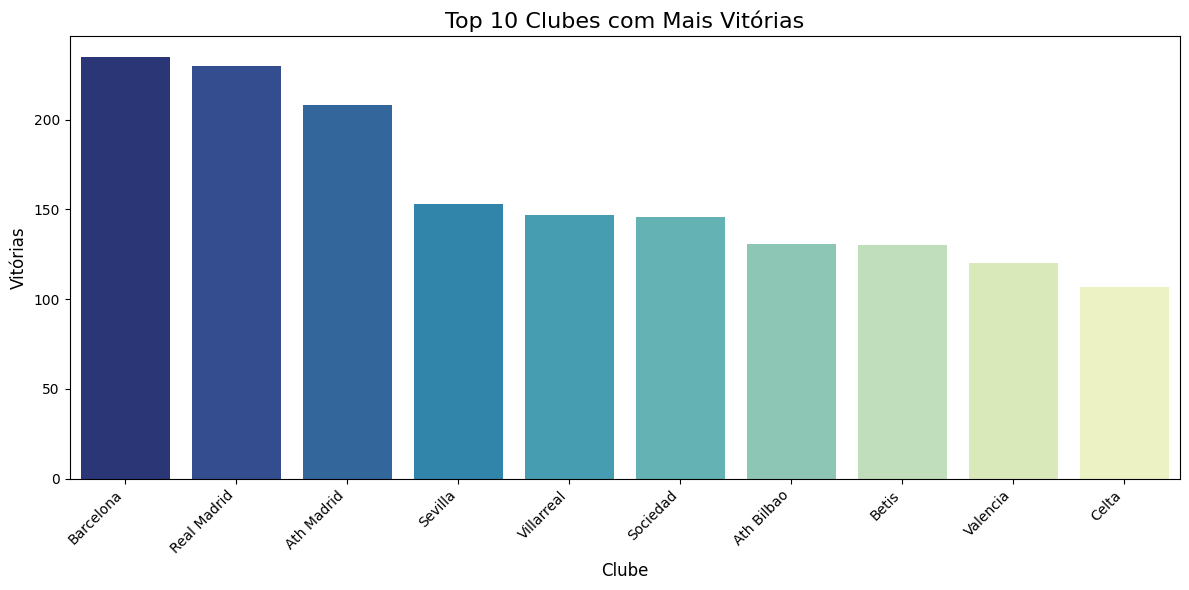

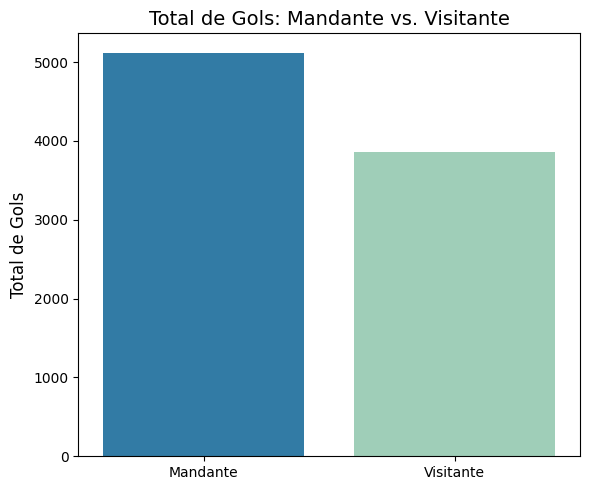

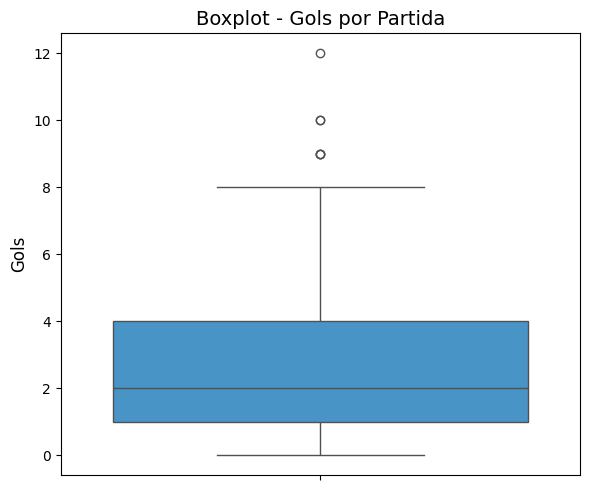

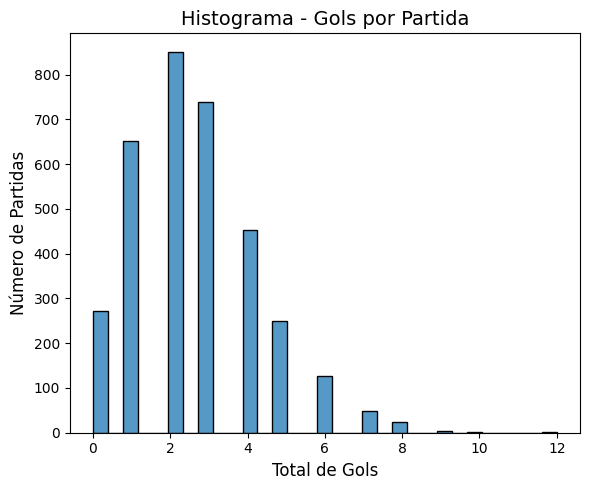

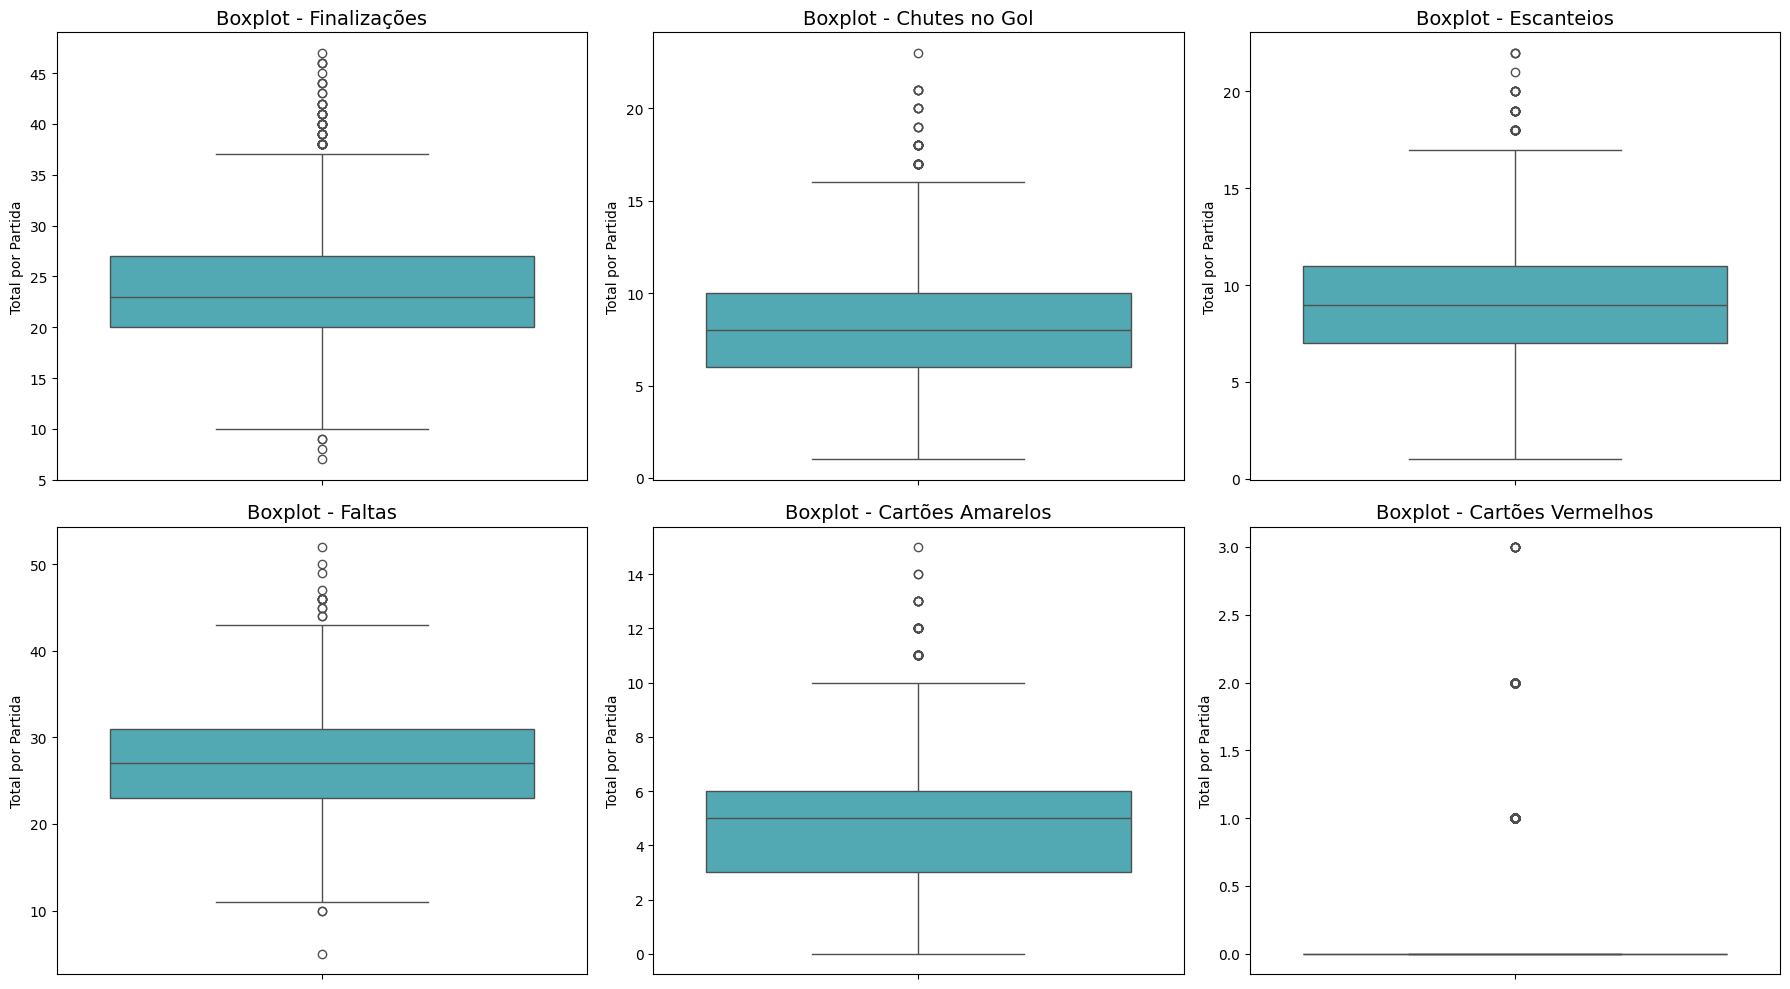

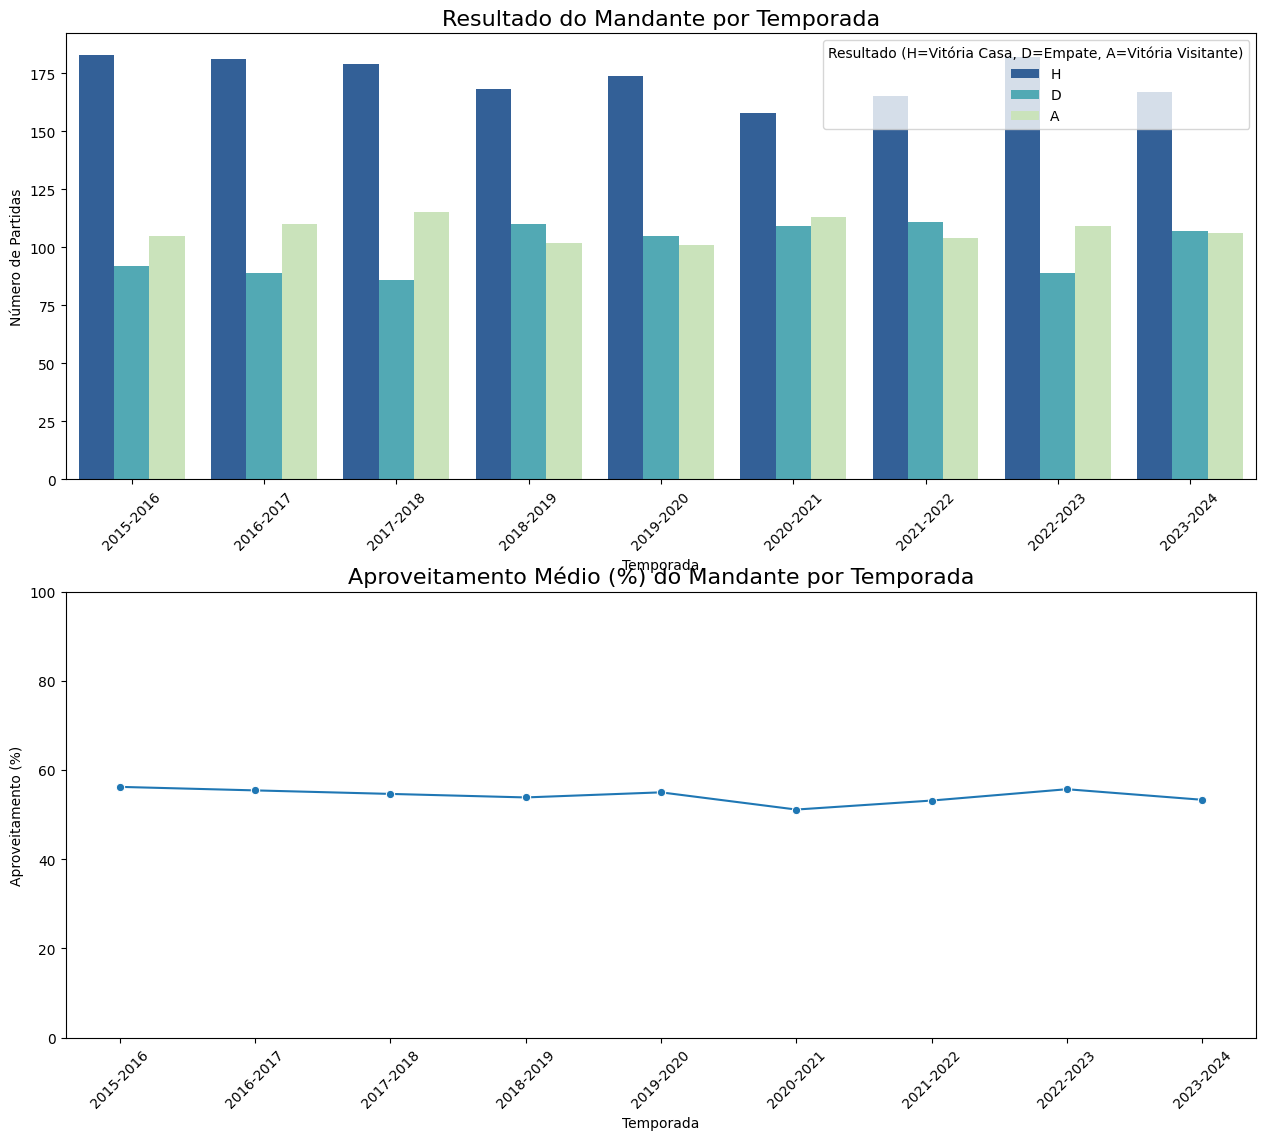

In [ ]:
# -*- coding: utf-8 -*-
"""
Dashboard Interativo com Gradio para Análise do Campeonato Espanhol.

Para executar:
1. Instale as bibliotecas necessárias: pip install gradio pandas matplotlib seaborn
2. Coloque os arquivos CSV de dados em uma pasta chamada 'dados'.
3. Execute o script a partir do terminal: python nome_do_arquivo.py
"""

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os
import gradio as gr
import warnings

warnings.filterwarnings('ignore')

# --- ETAPA 1: CARREGAMENTO E PREPARAÇÃO DOS DADOS ---
# Esta função centraliza toda a lógica de carregamento e transformação dos dados.
def carregar_e_preparar_dados(caminho_da_pasta):
    """
    Carrega, combina e transforma os dados de múltiplos arquivos CSV.
    """
    # Colunas a serem usadas
    colunas = [
        'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
        'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
        'AY', 'HR', 'AR'
    ]

    # Encontrar todos os arquivos CSV na pasta especificada
    todos_os_arquivos = glob.glob(os.path.join(caminho_da_pasta, '*.csv'))

    if not todos_os_arquivos:
        raise FileNotFoundError(f"Nenhum arquivo CSV encontrado em '{caminho_da_pasta}'. Verifique o caminho.")

    lista_de_dataframes = []

    # Loop para ler cada arquivo e adicionar a coluna 'temporada'
    for caminho_completo in todos_os_arquivos:
        nome_base_arquivo = os.path.basename(caminho_completo)
        nome_sem_extensao, _ = os.path.splitext(nome_base_arquivo)
        try:
            df_temp = pd.read_csv(caminho_completo, usecols=colunas, encoding='latin1')
            # Extrai um nome de temporada mais limpo do nome do arquivo
            temporada = nome_sem_extensao.replace('SP1_TP_', '').replace('_', '-')
            df_temp['temporada'] = temporada
            lista_de_dataframes.append(df_temp)
        except Exception as e:
            print(f"Erro ao ler {caminho_completo}: {e}")


    # Concatenar todos os DataFrames
    df_final = pd.concat(lista_de_dataframes, ignore_index=True)

    # Transformação: Criando novas features
    df_final['win'] = np.where(
        df_final['FTHG'] > df_final['FTAG'],
        df_final['HomeTeam'],
        np.where(
            df_final['FTAG'] > df_final['FTHG'],
            df_final['AwayTeam'],
            'Empate'
        )
    )

    df_final['ttl_gols'] = df_final['FTHG'] + df_final['FTAG']
    df_final['ttl_finalizacoes'] = df_final['HS'] + df_final['AS']
    df_final['ttl_chutes_gol'] = df_final['HST'] + df_final['AST']
    df_final['ttl_escanteios'] = df_final['HC'] + df_final['AC']
    df_final['ttl_faltas'] = df_final['HF'] + df_final['AF']
    df_final['ttl_cartoes_amarelo'] = df_final['HY'] + df_final['AY']
    df_final['ttl_cartoes_vermelho'] = df_final['HR'] + df_final['AR']

    return df_final

# --- ETAPA 2: FUNÇÕES PARA GERAR GRÁFICOS E TABELAS (COM AJUSTES) ---

def get_clubes_mais_vitorias_df(df):
    """Retorna um DataFrame com os clubes com mais vitórias."""
    mais_vitorias = df['win'].value_counts().reset_index()
    mais_vitorias = mais_vitorias.rename(columns={'win': 'clube', 'count': 'vitorias'})
    mais_vitorias = mais_vitorias[mais_vitorias['clube'] != 'Empate'].head(10)
    return mais_vitorias

def plot_clubes_mais_vitorias(df):
    """Gera um gráfico de barras com os 10 clubes com mais vitórias."""
    mais_vitorias = get_clubes_mais_vitorias_df(df)
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(data=mais_vitorias, x='clube', y='vitorias', palette='YlGnBu_r', ax=ax)
    ax.set_title("Top 10 Clubes com Mais Vitórias", fontsize=16)
    ax.set_xlabel('Clube', fontsize=12)
    ax.set_ylabel('Vitórias', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    return fig

def plot_comparacao_gols(df):
    """Gera um gráfico de barras comparando gols de mandantes e visitantes."""
    numero_gols = {'Mandante': df['FTHG'].sum(), 'Visitante': df['FTAG'].sum()}
    numero_gols = pd.DataFrame({'Tipo': numero_gols.keys(), 'Gols': numero_gols.values()})

    fig, ax = plt.subplots(figsize=(6, 5))
    sns.barplot(data=numero_gols, x='Tipo', y='Gols', palette='YlGnBu_r', ax=ax)
    ax.set_title('Total de Gols: Mandante vs. Visitante', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Total de Gols', fontsize=12)
    plt.tight_layout()
    return fig

# *** NOVO: Função apenas para o Boxplot ***
def plot_boxplot_gols(df):
    """Gera um boxplot da distribuição de gols por partida."""
    fig, ax = plt.subplots(figsize=(6, 5))
    sns.boxplot(data=df, y='ttl_gols', ax=ax, palette=['#3498db'])
    ax.set_title('Boxplot - Gols por Partida', fontsize=14)
    ax.set_ylabel('Gols', fontsize=12)
    plt.tight_layout()
    return fig

# *** NOVO: Função apenas para o Histograma ***
def plot_histograma_gols(df):
    """Gera um histograma da distribuição de gols por partida."""
    fig, ax = plt.subplots(figsize=(6, 5))
    sns.histplot(data=df, x='ttl_gols', ax=ax)
    ax.set_title('Histograma - Gols por Partida', fontsize=14)
    ax.set_ylabel('Número de Partidas', fontsize=12)
    ax.set_xlabel('Total de Gols', fontsize=12)
    plt.tight_layout()
    return fig


def plot_estatisticas_partida(df):
    """Gera boxplots para várias estatísticas de jogo."""
    estatisticas = {
        'Finalizações': 'ttl_finalizacoes',
        'Chutes no Gol': 'ttl_chutes_gol',
        'Escanteios': 'ttl_escanteios',
        'Faltas': 'ttl_faltas',
        'Cartões Amarelos': 'ttl_cartoes_amarelo',
        'Cartões Vermelhos': 'ttl_cartoes_vermelho'
    }

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for i, (titulo, coluna) in enumerate(estatisticas.items()):
        sns.boxplot(y=coluna, data=df, ax=axes[i], palette='YlGnBu_r')
        axes[i].set_title(f'Boxplot - {titulo}', fontsize=14)
        axes[i].set_ylabel('Total por Partida')
        axes[i].set_xlabel('')

    plt.tight_layout()
    return fig

def plot_desempenho_mandante(df):
    """Gera gráficos sobre o desempenho dos mandantes ao longo das temporadas."""
    pontos_map = {'H': 3, 'D': 1, 'A': 0}
    df['pontos_mandante'] = df['FTR'].map(pontos_map)

    aproveitamento_df = (df.groupby('temporada')['pontos_mandante'].mean() / 3 * 100).reset_index()
    aproveitamento_df.rename(columns={'pontos_mandante': 'aproveitamento_medio'}, inplace=True)

    fig, axes = plt.subplots(2, 1, figsize=(14, 12))
    fig.tight_layout(pad=6.0)

    # Gráfico de Contagem
    ordem_legenda = ['H', 'D', 'A']
    sns.countplot(x='temporada', hue='FTR', palette='YlGnBu_r', data=df, ax=axes[0], hue_order=ordem_legenda)
    axes[0].set_title('Resultado do Mandante por Temporada', fontsize=16)
    axes[0].set_ylabel('Número de Partidas')
    axes[0].set_xlabel('Temporada')
    axes[0].legend(title='Resultado (H=Vitória Casa, D=Empate, A=Vitória Visitante)')
    axes[0].tick_params(axis='x', rotation=45)

    # Gráfico de Linha (Aproveitamento)
    sns.lineplot(x="temporada", y='aproveitamento_medio', data=aproveitamento_df, marker='o', ax=axes[1])
    axes[1].set_title('Aproveitamento Médio (%) do Mandante por Temporada', fontsize=16)
    axes[1].set_ylabel('Aproveitamento (%)')
    axes[1].set_xlabel('Temporada')
    axes[1].set_ylim(0, 100)
    axes[1].tick_params(axis='x', rotation=45)

    return fig

# --- ETAPA 3: CONSTRUÇÃO DO DASHBOARD COM GRADIO (COM AJUSTES) ---

def criar_dashboard(df):
    """
    Cria e lança o dashboard do Gradio.
    """
    with gr.Blocks(theme=gr.themes.Soft(), title="Dashboard La Liga") as dashboard:
        gr.Markdown(
            """
            # Análise Exploratória - Campeonato Espanhol (La Liga)
            Dashboard interativo com os dados históricos do campeonato espanhol.
            """
        )

        with gr.Tabs():
            # Aba Principal com Visão Geral e Análise de Gols
            with gr.TabItem("🏆 Visão Geral e Gols"):
                gr.Markdown("### Quais são os 10 clubes com mais vitórias no histórico?")
                with gr.Row():
                    gr.DataFrame(value=get_clubes_mais_vitorias_df(df))
                    gr.Plot(value=plot_clubes_mais_vitorias(df))

                gr.Markdown("---") # Adiciona uma linha divisória
                gr.Markdown("### Como os gols se distribuem nas partidas?")

                # *** NOVO: Fileira com os 3 gráficos de gols lado a lado ***
                with gr.Row():
                    gr.Plot(value=plot_comparacao_gols(df))
                    gr.Plot(value=plot_boxplot_gols(df))
                    gr.Plot(value=plot_histograma_gols(df))

            # *** REMOVIDO: A aba "Análise de Gols" foi integrada acima ***

            with gr.TabItem("📊 Estatísticas das Partidas"):
                gr.Markdown("### Como as principais estatísticas se comportam por partida?")
                gr.Plot(value=plot_estatisticas_partida(df))

            with gr.TabItem("🏠 Desempenho dos Mandantes"):
                gr.Markdown("### O fator casa realmente faz a diferença ao longo das temporadas?")
                gr.Plot(value=plot_desempenho_mandante(df))

    return dashboard

# --- ETAPA 4: EXECUÇÃO PRINCIPAL ---

if __name__ == "__main__":
    # IMPORTANTE: Altere este caminho para a pasta onde seus arquivos CSV estão.
    # A forma mais fácil é criar uma pasta 'dados' ao lado do seu script.
    caminho_da_pasta = '/content/drive/MyDrive/python-data-analytics/aula04/dados'

    try:
        # Carrega e prepara os dados
        df_completo = carregar_e_preparar_dados(caminho_da_pasta)

        # Cria e lança o dashboard
        meu_dashboard = criar_dashboard(df_completo)
        meu_dashboard.launch()

    except FileNotFoundError as e:
        print(e)
        print("Script encerrado. Por favor, verifique o caminho para os dados.")